In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('world_happiness.csv')

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


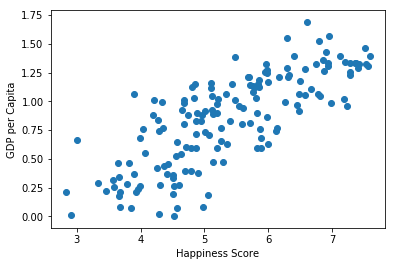

In [4]:
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')
plt.scatter(df['Happiness Score'],df['Economy (GDP per Capita)'])

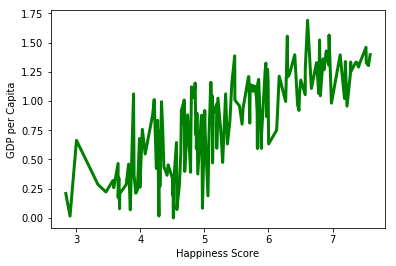

In [5]:
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')
plt.plot(df['Happiness Score'],df['Economy (GDP per Capita)'],color = "g", linewidth = 3)

# -->Therefore we can say that as "The GDP per capita" of a country is increasing it's "HAPPINESS SCORE" is increasing. 

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

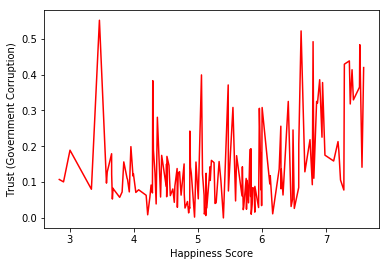

In [7]:
plt.xlabel('Happiness Score')
plt.ylabel("Trust (Government Corruption)")
plt.plot(df['Happiness Score'],df['Trust (Government Corruption)'],color = "r")

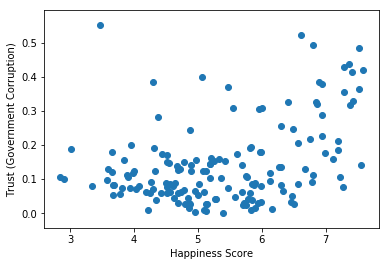

In [8]:
plt.xlabel('Happiness Score')
plt.ylabel('Trust (Government Corruption)')
plt.scatter(df['Happiness Score'],df['Trust (Government Corruption)'])

# -->We can observe that even countries that have high "happiness score" are having low "Trust", so therefore there is no strong relation between the two.

<BarContainer object of 158 artists>

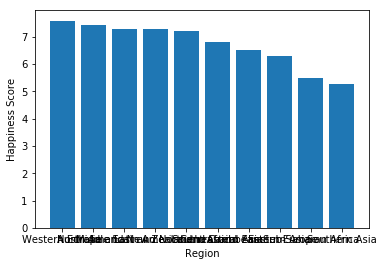

In [9]:
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.bar(df['Region'],df['Happiness Score'])

<BarContainer object of 158 artists>

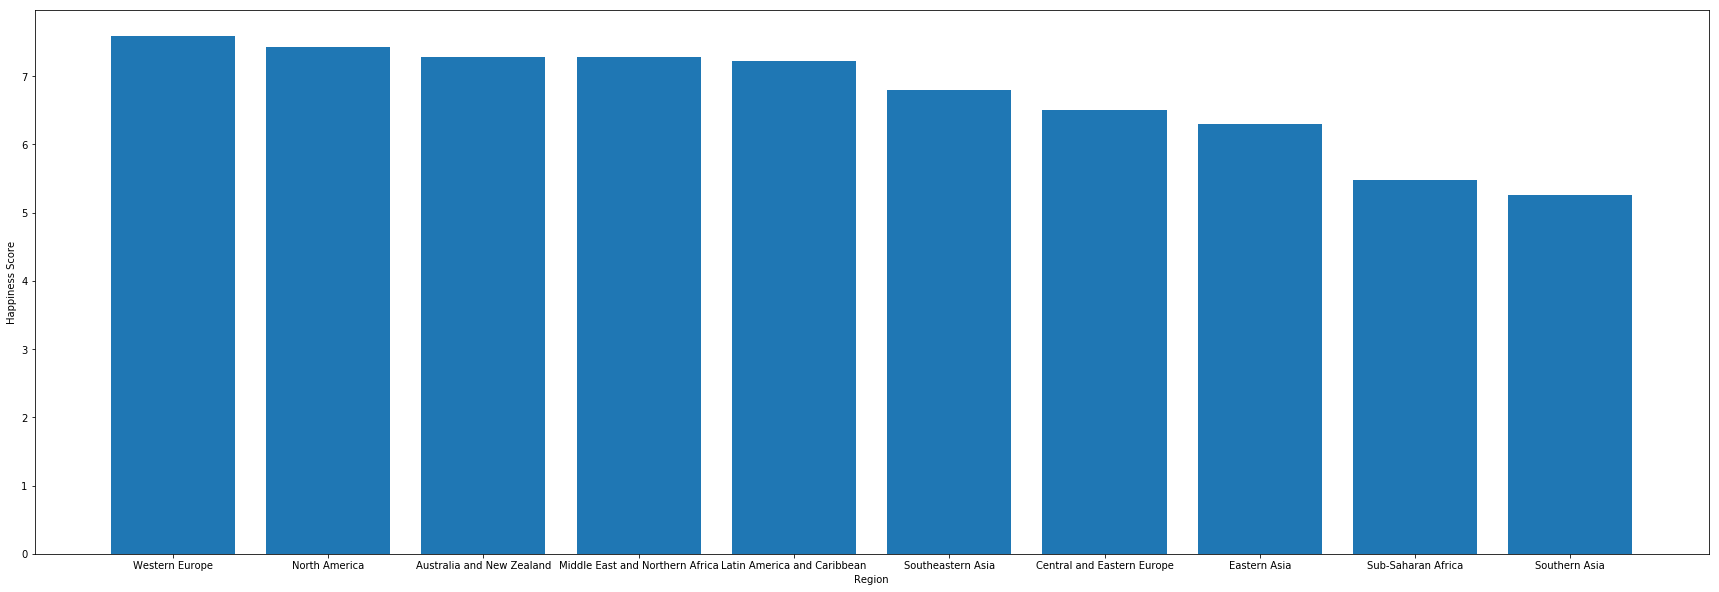

In [10]:
plt.figure(figsize = (30, 10)) 
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.bar(df['Region'],df['Happiness Score'])

-->Here we can observe that North America,Australia&NewZealand,Middle East&Northern Africa have very high happiness score but Western Europe has the highest happiness score among all the regions.

-->And Eastern Asia,Sub-Saharan Africa and Southern Asia have the lowest happiness score.

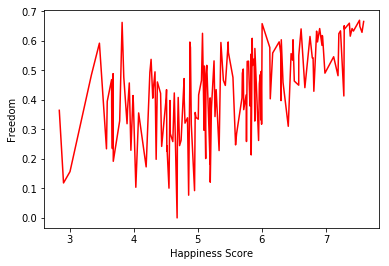

In [11]:
plt.xlabel('Happiness Score')
plt.ylabel("Freedom")
plt.plot(df['Happiness Score'],df['Freedom'],color = "r")

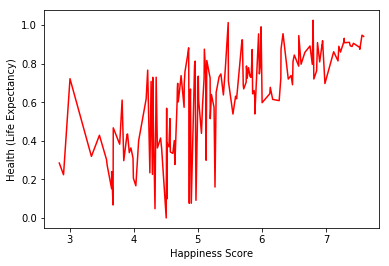

In [12]:
plt.xlabel('Happiness Score')
plt.ylabel("Health (Life Expectancy)")
plt.plot(df['Happiness Score'],df['Health (Life Expectancy)'],color = "r")

# -->Therefore we can say that as "Freedom" in a country is increasing it's "HAPPINESS SCORE" is also increasing.


# -->Also we can say that as "HAPPINESS SCORE" of a country increases it's "Health(Life expectancy)" automatically increases.

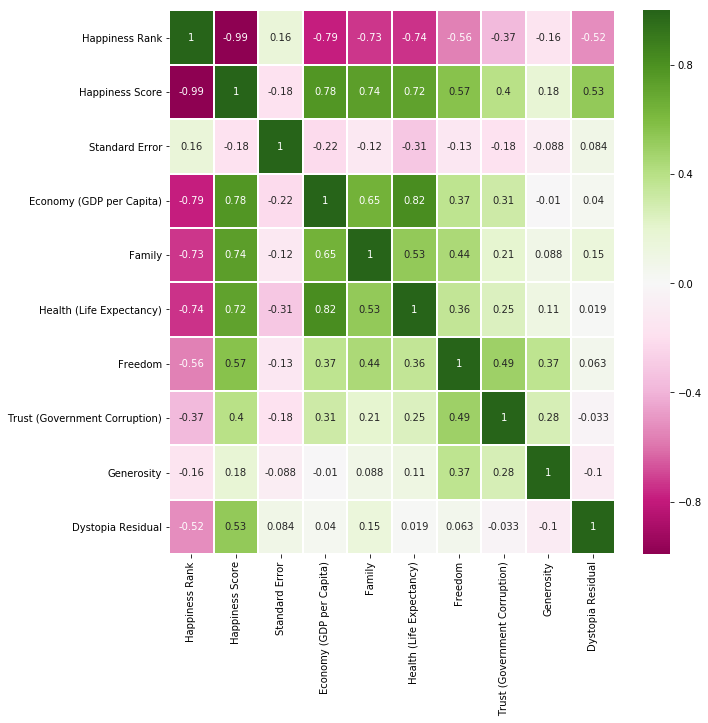

In [13]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(),annot=True,cmap="PiYG",lw=1)

# -->We can observe that "happiness score" is having -Ve correlation with "standard error" and but obvious "Happiness Rank" is strongly -ve correlated with happiness score.

# And Features like "Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Dystopia Residual" are having +ve correlation with "Happiness Score"

In [14]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

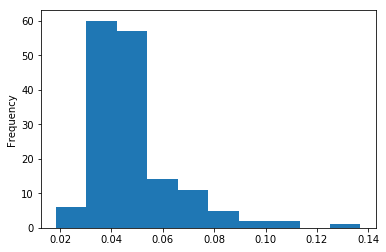

In [15]:
df['Standard Error'].plot.hist()

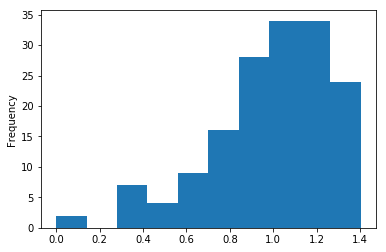

In [16]:
df['Family'].plot.hist()

In [17]:
from scipy.stats import boxcox

In [18]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [19]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [20]:
df['Standard Error'],lambd=boxcox(df['Standard Error'])

In [21]:
lambd


-0.3452705368641978

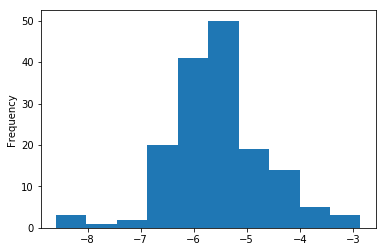

In [22]:
df['Standard Error'].plot.hist()

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
df.values

array([['Switzerland', 'Western Europe', 1, ..., 0.41978000000000004,
        0.29678000000000004, 2.5173799999999997],
       ['Iceland', 'Western Europe', 2, ..., 0.14145, 0.4363, 2.70201],
       ['Denmark', 'Western Europe', 3, ..., 0.48357, 0.34139,
        2.4920400000000003],
       ...,
       ['Syria', 'Middle East and Northern Africa', 156, ...,
        0.18905999999999998, 0.47179, 0.32858000000000004],
       ['Burundi', 'Sub-Saharan Africa', 157, ..., 0.10062, 0.19727,
        1.83302],
       ['Togo', 'Sub-Saharan Africa', 158, ..., 0.10730999999999999,
        0.16680999999999999, 1.56726]], dtype=object)

In [25]:
from scipy.stats import zscore

In [28]:
df.drop(['Country','Region'],axis=1,inplace=True)
z=np.abs(zscore(df))
z

array([[1.72099989, 1.93736005, 0.92076015, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.69907456, 1.91458063, 0.28363352, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.67714922, 1.88479215, 1.00901554, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [1.67742676, 2.0761992 , 0.3666731 , ..., 0.38141902, 1.85689094,
        3.20843049],
       [1.69935209, 2.1646885 , 1.92084724, ..., 0.35771452, 0.31694987,
        0.48198451],
       [1.72127743, 2.22251319, 1.23889708, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [29]:
threshold=3
print(np.where(z>3))

(array([ 20,  25,  27,  64, 128, 147, 153, 155, 157], dtype=int64), array([2, 2, 7, 2, 8, 4, 7, 9, 4], dtype=int64))


In [30]:
df_new=df[(z<3).all(axis=1)]

In [31]:
df.shape

(158, 10)

In [32]:
df_new.shape

(149, 10)

# Therefore as a result of removing outlier, "9" rows have been removed
NOW WE WILL REMOVE SKEWNESS

In [33]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                  -0.048030
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [34]:
df['Family'].replace(0,df['Family'].mean(axis=0),inplace=True)

In [35]:
df['Family'].values

array([1.34951   , 1.40223   , 1.36058   , 1.33095   , 1.32261   ,
       1.31826   , 1.28017   , 1.28907   , 1.31967   , 1.30923   ,
       1.22393   , 1.23788   , 1.29704   , 0.91451   , 1.24711   ,
       1.23287   , 1.21963   , 1.36948   , 1.28566   , 1.12575   ,
       1.28548   , 1.08182   , 1.25596   , 1.02      , 1.1985    ,
       1.29937   , 1.12447   , 1.0786    , 1.26038   , 1.24823   ,
       1.20643   , 1.2089    , 1.24018   , 1.26504   , 1.08393   ,
       1.31379   , 1.30203   , 1.07617   , 1.16594   , 0.972     ,
       1.18354   , 1.02507   , 1.04356   , 1.34043   , 1.26999   ,
       1.25712   , 0.95774   , 0.99903   , 1.21624   , 1.19777   ,
       0.97841   , 1.01528   , 1.30477   , 1.12241   , 1.27385   ,
       1.25745   , 1.14184   , 0.97459   , 1.23289   , 1.27948   ,
       1.07023   , 0.79624   , 1.11862   , 1.23617   , 1.15102   ,
       1.07008   , 0.89318   , 1.07772   , 0.81198   , 1.22668   ,
       0.98521   , 1.05818   , 1.22791   , 1.08708   , 0.91226

In [36]:
df['Family'],lambd1=boxcox(df['Family'])

In [37]:
df['Trust (Government Corruption)'].replace(0,df['Trust (Government Corruption)'].mean(axis=0),inplace=True)

In [38]:
df['Trust (Government Corruption)'],lambd2=boxcox(df['Trust (Government Corruption)'])

In [39]:
df['Generosity'].replace(0,df['Generosity'].mean(axis=0),inplace=True)

In [40]:
df['Generosity'],lambd3=boxcox(df['Generosity'])

In [41]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                  -0.048030
Economy (GDP per Capita)        -0.317575
Family                          -0.239267
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)   -0.008518
Generosity                       0.068236
Dystopia Residual               -0.238911
dtype: float64

# Therefore we have successfully removed skewness from 4 columns and Outliers

In [42]:
x=df.iloc[:,2:-1]

In [43]:
y=df['Happiness Score']

In [44]:
x.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,-6.401799,1.39651,0.410012,0.94143,0.66557,-0.780606,-0.915600
1,-5.317965,1.30232,0.482350,0.94784,0.62877,-1.548231,-0.681651
2,-6.481220,1.32548,0.424973,0.87464,0.64938,-0.664613,-0.835640
3,-5.997274,1.45900,0.385199,0.88521,0.66973,-0.891251,-0.825989
4,-6.271776,1.32629,0.374160,0.90563,0.63297,-0.969754,-0.648763


In [45]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

# Therefore we have segregated x and y.
x=contains each column except happiness score,country and region{we can use label encoder if we want to add country and region to x}
y=happiness score

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33)

In [47]:
x_train.shape

(105, 7)

In [48]:
y_train.shape

(105,)

In [49]:
x_test.shape

(53, 7)

In [50]:
y_test.shape

(53,)

In [51]:
lm=LinearRegression()

In [52]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
lm.score(x_train,y_train)

0.7711012902860234

In [54]:
pred=lm.predict(x_test)

In [55]:
print(mean_squared_error(y_test,pred))
print(mean_absolute_error(y_test,pred))

0.24876838701854226
0.39321269368480605


In [56]:
print(r2_score(y_test,pred))

0.8082514999278134


In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
dt=DecisionTreeRegressor()

In [59]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [60]:
dt.score(x_train,y_train)

1.0

In [61]:
dt.predict(x_test)

array([5.855, 2.905, 3.781, 5.073, 6.611, 5.759, 4.681, 7.427, 5.36 ,
       6.867, 6.269, 7.119, 3.956, 3.681, 4.694, 6.575, 5.948, 5.399,
       4.518, 6.786, 7.2  , 6.853, 4.517, 4.694, 4.218, 5.791, 3.781,
       5.759, 3.656, 5.605, 3.681, 5.791, 4.194, 5.123, 5.89 , 5.759,
       6.786, 6.575, 6.786, 7.561, 5.96 , 5.286, 5.759, 6.269, 6.946,
       5.605, 4.694, 4.61 , 5.813, 4.867, 4.715, 5.848, 5.948])

In [62]:
print(mean_squared_error(y_test,dt.predict(x_test)))
print(mean_absolute_error(y_test,dt.predict(x_test)))
print(r2_score(y_test,dt.predict(x_test)))

0.5554009811320753
0.5836603773584904
0.5719017743892099


In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rf= RandomForestRegressor()
rf.fit(x_train,y_train)

C:\Users\RK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [65]:
rf.score(x_train,y_train)

0.9322670921040697

In [66]:
rf.predict(x_test)

array([5.8351, 3.2262, 4.3621, 5.35  , 7.1048, 5.4718, 4.8445, 7.3196,
       5.3489, 6.5068, 6.3518, 6.2271, 4.2288, 4.3814, 3.4924, 6.1764,
       5.791 , 4.8827, 4.1405, 6.0096, 7.2244, 6.7518, 4.7053, 4.7188,
       5.1477, 5.6474, 3.9677, 5.5593, 3.8136, 5.1588, 4.3939, 5.6145,
       4.3968, 5.449 , 5.0824, 5.6614, 6.0189, 6.088 , 6.5848, 7.3355,
       6.2438, 4.4731, 5.9225, 5.2836, 6.9427, 5.4004, 3.7737, 4.3852,
       5.5639, 3.8411, 4.539 , 6.5943, 5.6631])

In [67]:
print(mean_squared_error(y_test,rf.predict(x_test)))
print(mean_absolute_error(y_test,rf.predict(x_test)))
print(r2_score(y_test,rf.predict(x_test)))

0.2924589567924527
0.45098679245283
0.7745751903217133


# -->Therefore Out of these 3 algorithms,LINEAR Regression is best suited for this DATASET with 80% R2 Score.